### Задание

In [1]:
import numpy as np
import pandas as pd
import html5lib
titanic = pd.read_html('https://github.com/ogrisel/parallel_ml_tutorial/blob/master/notebooks/titanic_train.csv', header = 0, index_col='PassengerId')[0]
titanic = titanic.drop(titanic.columns[0], axis=1) # уберем не информативную колонку
titanic.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


**1. Сколько мужчин / женщин находилось на борту?**

In [9]:
titanic['Sex'].value_counts()

male      577
female    314
Name: Sex, dtype: int64

**2. Выведите распределение переменной `Pclass` (социально-экономический статус) и это же распределение, только для мужчин / женщин по отдельности. Сколько было мужчин 2-го класса?**

* 104
* **108 <---**
* 112
* 125

*распределение переменной Pclass (социально-экономический статус)*

In [10]:
titanic['Pclass'].describe()

count    891.000000
mean       2.308642
std        0.836071
min        1.000000
25%        2.000000
50%        3.000000
75%        3.000000
max        3.000000
Name: Pclass, dtype: float64

*это же распределение, только для мужчин / женщин по отдельности*

In [11]:
titanic[titanic['Sex'] == 'male']['Pclass'].describe()

count    577.000000
mean       2.389948
std        0.813580
min        1.000000
25%        2.000000
50%        3.000000
75%        3.000000
max        3.000000
Name: Pclass, dtype: float64

In [12]:
titanic[titanic['Sex'] == 'female']['Pclass'].describe()

count    314.000000
mean       2.159236
std        0.857290
min        1.000000
25%        1.000000
50%        2.000000
75%        3.000000
max        3.000000
Name: Pclass, dtype: float64

*Сколько было мужчин 2-го класса?*

<AxesSubplot:ylabel='Frequency'>

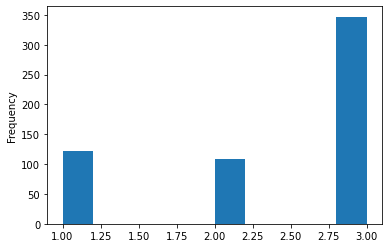

In [13]:
titanic[titanic['Sex'] == 'male']['Pclass'].plot(kind='hist')

**3. Каковы медиана и стандартное отклонение платежей (Fare)? Округлите до 2 десятичных знаков.**

* **Медиана – 14.45, стандартное отклонение – 49.69 <---**
* Медиана – 15.1, стандартное отклонение – 12.15
* Медиана – 13.15, стандартное отклонение – 35.3
* Медиана – 17.43, стандартное отклонение – 39.1

In [14]:
round(titanic['Fare'].median(),2)

14.45

In [15]:
round(titanic['Fare'].std(),2)

49.69

**4. Правда ли, что люди моложе 30 лет выживали чаще, чем люди старше 60 лет? Каковы доли выживших в обеих группах?**
* 22.7% среди молодых и 40.6% среди старых
* **40.6% среди молодых и 22.7% среди старых <---**
* 35.3% среди молодых и 27.4% среди старых
* 27.4% среди молодых и 35.3% среди старых

*среди молодых*

In [16]:
str(round(len(titanic[(titanic['Age'] < 30) & (titanic['Survived'] == 1)])/len(titanic[titanic['Age'] < 30])*100,1))+'%'

'40.6%'

*среди старых*

In [17]:
str(round(len(titanic[(titanic['Age'] > 60) & (titanic['Survived'] == 1)])/len(titanic[titanic['Age'] > 60])*100,1))+'%'

'22.7%'

Да, это правда

**5. Правда ли, что женщины выживали чаще мужчин? Каковы доли выживших в обеих группах?**

* 30.2% среди мужчин и 46.2% среди женщин
* 35.7% среди мужчин и 74.2% среди женщин
* 31.8% среди мужчин и 68.1% среди женщин
* **18.9% среди мужчин и 74.2% среди женщин <---**

*среди мужчин*

In [18]:
str(round(len(titanic[(titanic['Sex'] == 'male') & (titanic['Survived'] == 1)])/len(titanic[titanic['Sex'] == 'male'])*100,1))+'%'

'18.9%'

*среди женщин*

In [19]:
str(round(len(titanic[(titanic['Sex'] == 'female') & (titanic['Survived'] == 1)])/len(titanic[titanic['Sex'] == 'female'])*100,1))+'%'

'74.2%'

In [20]:
titanic[titanic['Survived'] == 1]['Sex'].value_counts()

female    233
male      109
Name: Sex, dtype: int64

Да, правда

**6. Найдите самое популярное имя среди пассажиров Титаника мужского пола?**

* Charles
* Thomas
* **William <---**
* John

In [21]:
titanic['Male_Firstname'] = titanic[titanic['Sex'] == 'male']['Name'].apply(lambda x: x.split('.')[1].split(' ')[1])
titanic.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_category,Male_Firstname
PassengerId,,,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1,Owen
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,2,NaN
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1,NaN
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,2,NaN
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,2,William


In [22]:
from collections import Counter
Counter(titanic['Male_Firstname']).most_common()[1][0]
# [1][0] - т.к. самый популярный NaN ;)

'William'

**7. Сравните распределение возраста у спасенных и у погибших. Средний возраст погибших выше, верно?**

* **Да <---**
* Нет

*распределение возраста у спасенных*

In [23]:
titanic[titanic['Survived'] == 1]['Age'].describe()

count    290.000000
mean      28.343690
std       14.950952
min        0.420000
25%       19.000000
50%       28.000000
75%       36.000000
max       80.000000
Name: Age, dtype: float64

*распределение возраста у погибших*

In [24]:
titanic[titanic['Survived'] == 0]['Age'].describe()

count    424.000000
mean      30.626179
std       14.172110
min        1.000000
25%       21.000000
50%       28.000000
75%       39.000000
max       74.000000
Name: Age, dtype: float64

In [25]:
# mean      28.343690 < mean      30.626179

**8. Как отличается средний возраст мужчин / женщин в зависимости от класса обслуживания? Выберите верные утверждения:**

* **В среднем мужчины 1-го класса старше 40 лет <---**
* В среднем женщины 1-го класса старше 40 лет
* **Мужчины всех классов в среднем старше женщин того же класса <---**
* **В среднем люди в 1 классе старше, чем во 2-ом, а те старше представителей 3-го класса <---**

In [26]:
pclass = titanic['Pclass'].unique()
pclass.sort()
pclass

array([1, 2, 3], dtype=int64)

In [27]:
sex = titanic['Sex'].unique()
sex.sort()
sex

array(['female', 'male'], dtype=object)

In [28]:
for i in sex:
    _ = titanic[(titanic['Sex'] == i) & (titanic['Pclass'] == 1)]['Age'].mean()
    print(f" 1 class {i}'s age mean is {round(_,1)} years")

 1 class female's age mean is 34.6 years
 1 class male's age mean is 41.3 years


In [32]:
for c in pclass:
    print(f'{c} class:')
    for i in sex:
        _ = titanic[(titanic['Sex'] == i) & (titanic['Pclass'] == c)]['Age'].mean()
        print(f"    {i}'s age mean is {round(_,1)} years")

1 class:
    female's age mean is 34.6 years
    male's age mean is 41.3 years
2 class:
    female's age mean is 28.7 years
    male's age mean is 30.7 years
3 class:
    female's age mean is 21.8 years
    male's age mean is 26.5 years


In [36]:
for c in pclass:
    _ = titanic[titanic['Pclass'] == c]['Age'].mean()
    print(f"    {c} class age mean is {round(_,1)} years")

    1 class age mean is 38.2 years
    2 class age mean is 29.9 years
    3 class age mean is 25.1 years
